In [1]:
from PyAstronomy import pyasl
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)
SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25
colormap={0:'red',1:'green'}
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True 
plt.rcParams['xtick.labelsize'] = plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['xtick.major.size'] = plt.rcParams['ytick.major.size'] = 7
plt.rcParams['xtick.minor.size'] = plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['xtick.major.width'] = plt.rcParams['ytick.major.width'] = 1.6
plt.rcParams['font.size'] = 12

In [2]:
folder='Example_observation'

with open(f'{folder}/extinct.dat') as f:
    lines=f.readlines()
    for i in range(len(lines)):
        if 'E(B-V)' in lines[i]:
            e_bv=float(lines[i+1])
        if 'R_V' in lines[i]:
            R_V=float(lines[i+1])
print(f'E(B-V)={e_bv}')
print(f'R_V={R_V}')

E(B-V)=0.41113
R_V=3.1


In [3]:
data_array=[]
with open(f'{folder}/SEDobs.dat') as f:
    lines=f.readlines()
    header=lines[1].split()
    if header[0]=='lam[mic]' and header[1]=='flux[Jy]' and header[2]=='sigma[Jy]' and header[3]=='rem':
        for i in range(2,len(lines)):
            sp_line=lines[i].split()
            if sp_line==[]:
                print('Empty line')
            elif sp_line[3]=='ok':
                lam=float(sp_line[0])
                flux=float(sp_line[1])
                flux_sig=float(sp_line[2])
                data_array.append([lam,flux,flux_sig])
    else:
        print('Different Header')
        print(header)
data_array=np.asarray(data_array)
nu=2.99792458*10**14/data_array[:,0]
data_array[:,1]=data_array[:,1]*10**(-23)*nu

data_array[:,2]=data_array[:,2]*10**(-23)*nu

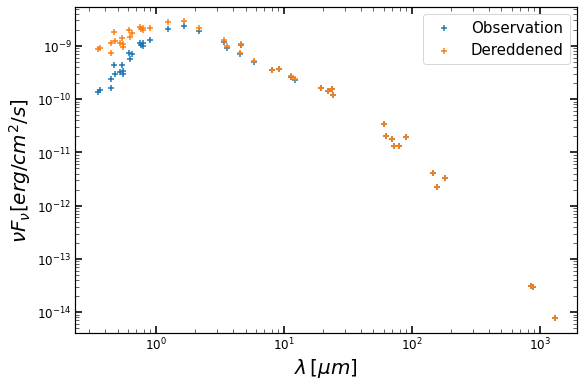

In [8]:
# Deredden the spectrum assuming ebv=0.1
fluxUnred = pyasl.unred(data_array[:,0]*10**4, data_array[:,1], ebv=e_bv, R_V=R_V)

# Plot the result
plt.figure()
plt.scatter(data_array[:,0], data_array[:,1],marker='+',label='Observation')
plt.scatter(data_array[:,0], fluxUnred,marker='+',label='Dereddened')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$ \lambda \, [\mu m]$')
plt.ylabel(r'$ \nu F_\nu [erg/cm^2/s]$')
plt.legend()
plt.show()